# Master Routine tester
---

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from time import time

from wifi_matrix import basic_lu
from find_optimal import find_optimal_2
from gaussianGrid import gauss_grid

In [46]:
%time lu, img = basic_lu("testrom3.png", higher_order= True)

Generating new A. 
Wall time: 1min 10s


In [47]:
x_c, y_c, scores_c, max_arg_c = find_optimal_2(lu, img, 20, True) # with convolution

Got positions
Getting solutions took 80.47s
178
(9, 16)
311 634


In [48]:
x, y, scores, max_arg = find_optimal_2(lu, img, 20, False) # without convolution

Got positions
Getting solutions took 79.78s
178
(9, 16)
311 634


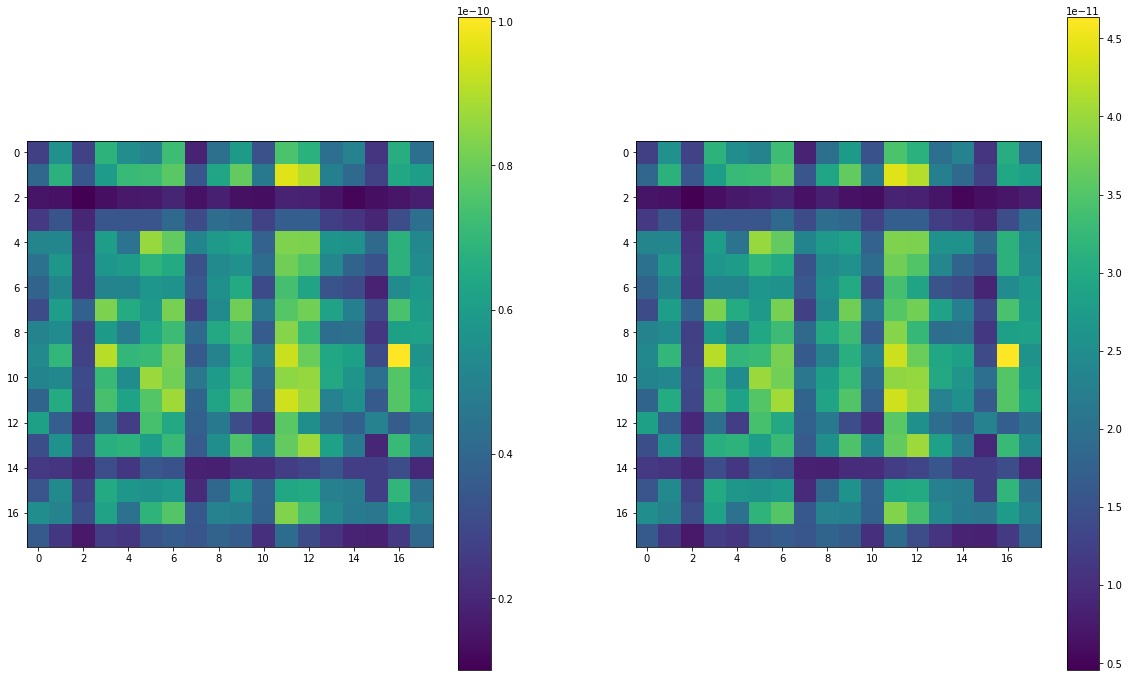

In [49]:
plt.figure(figsize=(20,12))
plt.subplot(121)
plt.imshow(scores)
plt.colorbar()
plt.subplot(122)
plt.imshow(scores_c)
plt.colorbar()

## Check if these points make sense
---

In [50]:
304+9

313

In [51]:
x= 295
y= 455

In [52]:
from wifi_matrix import solve_single_system
from find_optimal import convolve_solution
from score import step_score

In [53]:
sol = solve_single_system(lu, x, y, img.shape)

In [54]:
conv_sol = convolve_solution(sol, img.shape)

In [55]:
sc = step_score(sol,img)
sc_conv = step_score(conv_sol,img)

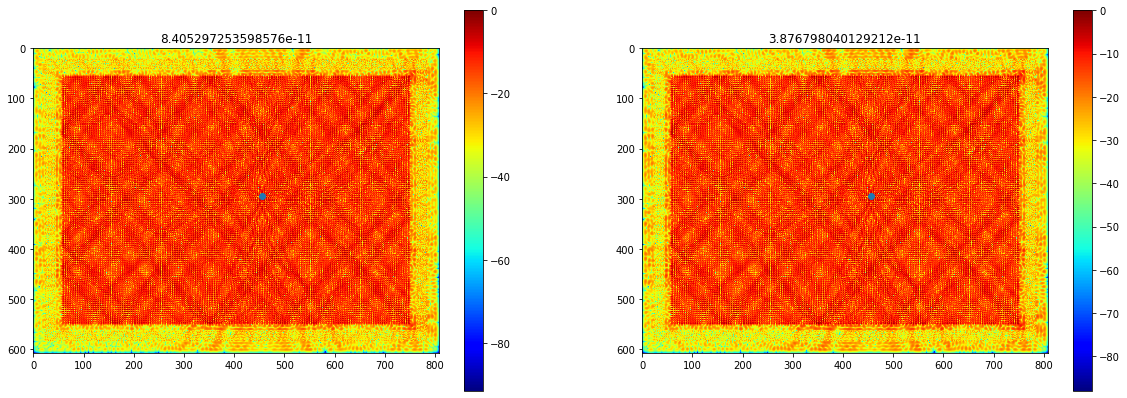

In [56]:
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(10*np.log10(np.abs(sol.reshape(img.shape))**2 /(np.max(np.abs(sol)**2))), cmap='jet')
plt.title(f"{sc}")
plt.colorbar()
plt.scatter(y,x)
plt.subplot(122)
plt.imshow(10*np.log10(np.abs(conv_sol.reshape(img.shape))**2 /(np.max(np.abs(conv_sol)**2))), cmap='jet')
plt.colorbar()
plt.title(f"{sc_conv}")
plt.scatter(y,x)

## Compare to placement in the middle of the apartment
---

In [57]:
x0, y0 = img.shape
x0 = x0 //2
y0 = y0 //2
x0, y0

(304, 404)

In [58]:
sol0 = solve_single_system(lu, x0, y0, img.shape)
conv_sol0 = convolve_solution(sol0, img.shape)

In [59]:
sc0 = step_score(sol0,img)
sc_conv0 = step_score(conv_sol0,img)

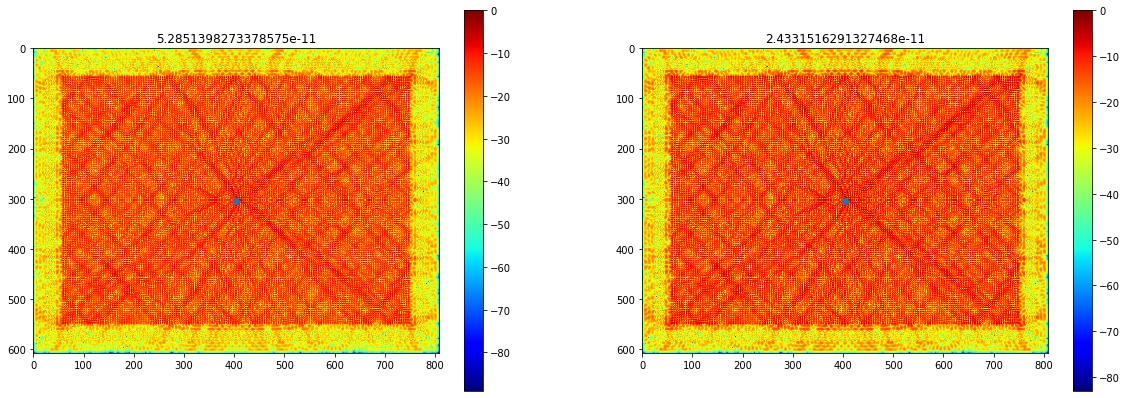

In [60]:
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(10*np.log10(np.abs(sol0.reshape(img.shape))**2 /(np.max(np.abs(sol0)**2))), cmap='jet')
plt.title(f"{sc0}")
plt.colorbar()
plt.scatter(y0,x0)
plt.subplot(122)
plt.imshow(10*np.log10(np.abs(conv_sol0.reshape(img.shape))**2 /(np.max(np.abs(conv_sol0)**2))), cmap='jet')
plt.colorbar()
plt.title(f"{sc_conv0}")
plt.scatter(y0,x0)

## Check opposite side
---

In [61]:
x1, y1 = img.shape
x1 = x1 //2
y1 = y1 //2
diffx = x1-x
diffy = y1-y
x1 = x1 + diffx
y1 = y1+diffy
x1, y1

(313, 353)

In [62]:
sol1 = solve_single_system(lu, x1, y1, img.shape)
conv_sol1 = convolve_solution(sol1, img.shape)
sc1 = step_score(sol1,img)
sc_conv1 = step_score(conv_sol1,img)

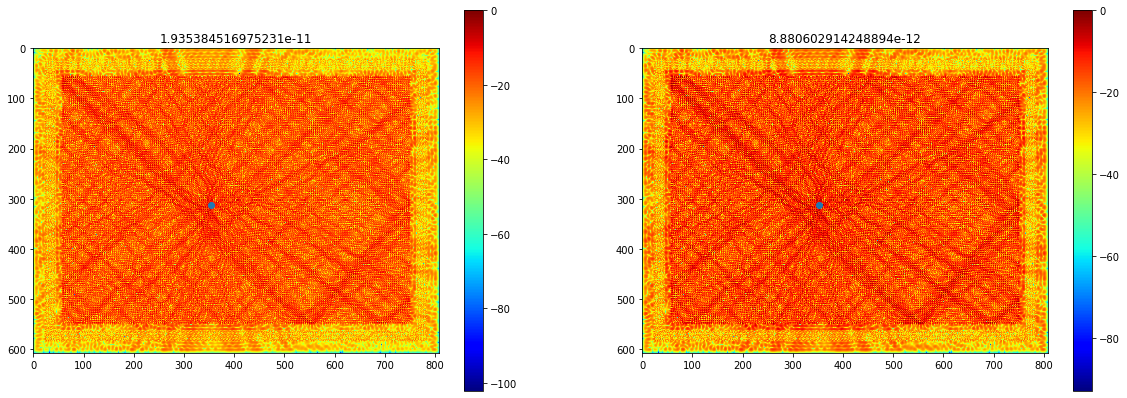

In [64]:
plt.figure(figsize=(20,7))

plt.subplot(121)
plt.imshow(10*np.log10(np.abs(sol1.reshape(img.shape))**2 /(np.max(np.abs(sol1)**2))), cmap='jet')
plt.title(f"{sc1}")
plt.colorbar()
plt.scatter(y1,x1)
plt.subplot(122)
plt.imshow(10*np.log10(np.abs(conv_sol1.reshape(img.shape))**2 /(np.max(np.abs(conv_sol1)**2))), cmap='jet')
plt.colorbar()
plt.title(f"{sc_conv1}")
plt.scatter(y1,x1)